In [143]:
import numpy as np
import pandas as pd 
from typing import Any
import seaborn as sns
import matplotlib.pyplot as plt

## Data Source: https://www.hockey-reference.com/leagues/NHL_2022.html ##

## Dataset

In [144]:
df = pd.DataFrame(pd.read_csv('../team_stats.csv', index_col=[0]))
df.head()

,Team,AvAge,GP,W,L,OL,PTS,PTS%,GF,GA,...,PK%,SH,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO
Rk,,,,,,,,,,,,,,,,,,,,,
1,Florida Panthers,27.8,82,58,18,6,122,0.744,337,242,...,79.54,12,8,10.1,10.8,3062,11.0,2515,0.904,5
2,Colorado Avalanche,28.2,82,56,19,7,119,0.726,308,232,...,79.66,6,5,9.0,10.4,2874,10.7,2625,0.912,7
3,Carolina Hurricanes,28.3,82,54,20,8,116,0.707,277,200,...,88.04,4,3,9.2,7.7,2798,9.9,2310,0.913,6
4,Toronto Maple Leafs,28.4,82,54,21,7,115,0.701,312,252,...,82.05,13,4,8.6,8.5,2835,11.0,2511,0.900,7
5,Minnesota Wild,29.4,82,53,22,7,113,0.689,305,249,...,76.14,2,5,10.8,10.8,2666,11.4,2577,0.903,3


## EDA

Looking into the data, some key metrics indicating win-potential in a biased assumption are:
- Goal Differential (goals for versus against a team)
- Points Percentage (PTS%)
- Win/Loss ratio
- Overtime Losses (OL)
- Shootout W/L Ratio
- Penalty Killing Percentage (PK%)
- Power Play Performance Ratio: Power Play Goals (PP) versus Power Play Goals Against (PPA)
- Save Percentage (SV%), or save efficiency
- Shooting Percentage (S%), or accuracy

Few of these exist within the data and some will need to be extracted as features. 

### Correlations

Plotting correlations in the data, I'm looking at any at least 90% strong and less than a 100% correlation to focus on variables of interest. 

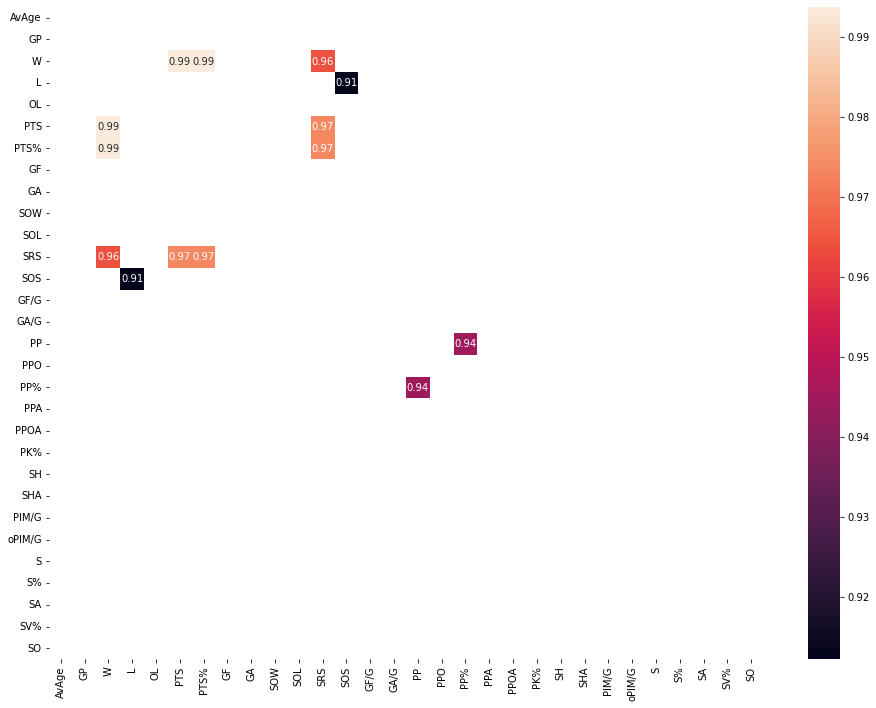

In [145]:
## Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(16,12))

corr = df.corr()
corr = corr[np.logical_and(corr>0.90, corr<.9999)].abs()

sns.heatmap(corr, annot=True)
plt.show()



## Feature Engineering
> Deterimining features based upon EDA

In [146]:
# Creating Column for Total Goals 
df['G'] = df.GF + df.GA 
# Creating Column for Total Power-Play Goals 
df['PPG'] = df.PP + df. PPA
# Creating Column for Total Games in Shootouts
df['SHOOTOUT'] = df.SOW + df. SOL

def ratio_maker(df: pd.DataFrame, newcol: str, xcol: str, ycol: str) -> Any: 
    """ Ridiculous Over-Complicated Function for Creating Ratio Stats Because I'm Lazy """
    df[f"{newcol}"] = (df[f"{xcol}"] / df[f"{ycol}"]).apply(lambda x: "{:.2%}".format(x)) 

## Calc new metrics and store in new cols 
ratio_maker(df, "WL%", "W", "GP") # win-loss percentage
ratio_maker(df, "GDIFF", "GF", "G") # goal differential
ratio_maker(df, "SOWL%", "SOW", "SHOOTOUT") # shootout win-loss ratio 
ratio_maker(df, "PPWL%", "PP", "PPG") # power-play win-loss percentage

In [153]:
# Show New Metrics

wins = df[['Team','WL%', 'GDIFF', 'SOWL%', 'PPWL%']].sort_values('WL%', ascending=False).set_index('Team').head(10)
wins 

,WL%,GDIFF,SOWL%,PPWL%
Team,,,,
Florida Panthers,70.73%,58.20%,42.86%,54.70%
Colorado Avalanche,68.29%,57.04%,66.67%,58.26%
Carolina Hurricanes,65.85%,58.07%,33.33%,60.71%
Toronto Maple Leafs,65.85%,55.32%,75.00%,60.00%
Minnesota Wild,64.63%,55.05%,55.56%,45.69%
New York Rangers,63.41%,55.07%,57.14%,57.89%
Tampa Bay Lightning,62.20%,55.56%,28.57%,55.86%
Boston Bruins,62.20%,53.72%,50.00%,50.51%
Calgary Flames,60.98%,58.55%,50.00%,56.25%
